In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'dataSets\Mobile price\train.csv')
test = pd.read_csv(r'dataSets\Mobile price\test.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

we have 500 datapoints from each labels, so Data is balanced

**battery_power**: It's battery size in mah

In [7]:
train['battery_power'].sample(5)

1939    1588
990     1483
1797     873
0        842
1380    1811
Name: battery_power, dtype: int64

In [8]:
train['battery_power'].value_counts()

battery_power
1872    6
618     6
1589    6
1083    5
1807    5
       ..
1492    1
1251    1
636     1
1354    1
583     1
Name: count, Length: 1094, dtype: int64

In [9]:
print(f"battery_power ranges between {train['battery_power'].min()} and {train['battery_power'].max()}" )

battery_power ranges between 501 and 1998


<Axes: xlabel='battery_power', ylabel='Count'>

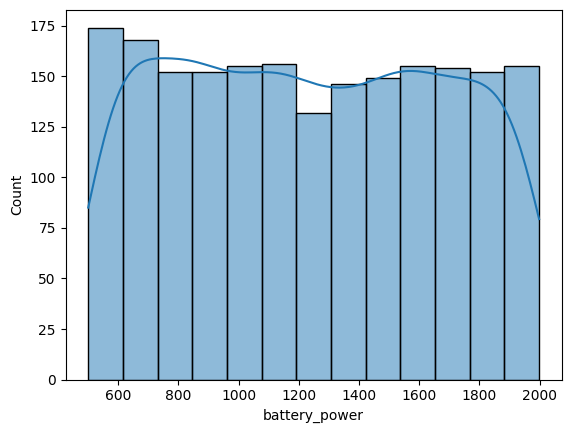

In [10]:
sns.histplot(x='battery_power',data=train, kde=True)

DIstribution not following normal distribution

<Axes: xlabel='battery_power', ylabel='Density'>

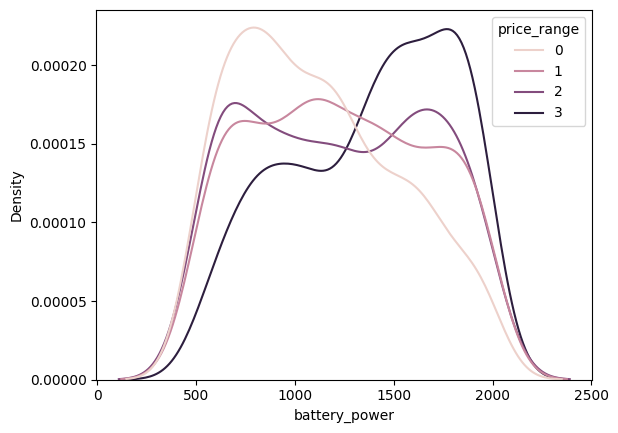

In [11]:
sns.kdeplot(x='battery_power',hue='price_range',data=train)

*price range 1 mostly seems like right skewed whcih means most phones gives a smaller battery capacity in this price range. in price range 2 and 3 we have similar distribution, we get a better battery capacity in price range 2 and 3. as we move to a higher price range, we will get a better battery power*

<Axes: >

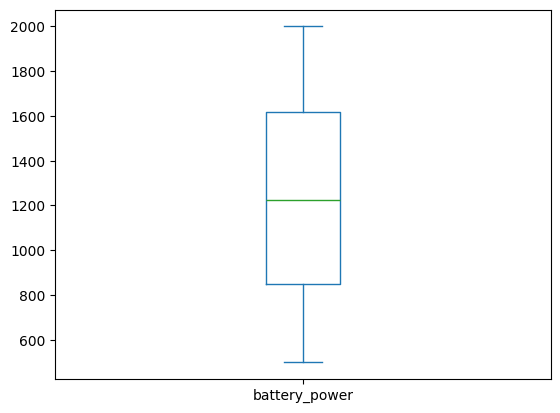

In [12]:
# checking for outliers
train['battery_power'].plot(kind='box')

no outliers found

<Axes: xlabel='price_range', ylabel='battery_power'>

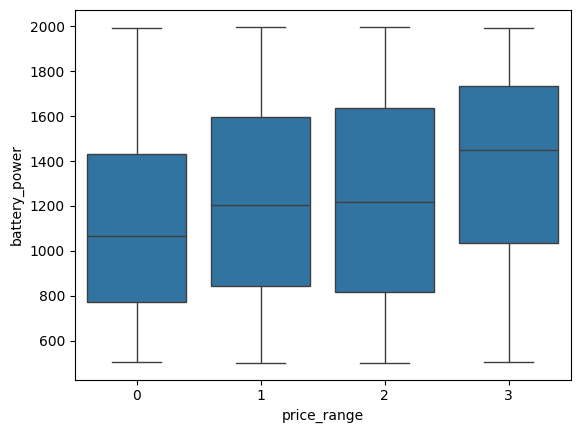

In [13]:
sns.boxplot(x='price_range',y='battery_power',data=train)

**blue**: Has bluetooth or not

In [14]:
train['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [15]:
train['blue'].value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

In [16]:
train[['blue', 'price_range']].value_counts()

blue  price_range
1     3              259
0     0              257
      2              257
      1              255
1     1              245
      0              243
      2              243
0     3              241
Name: count, dtype: int64

<Axes: xlabel='price_range', ylabel='blue'>

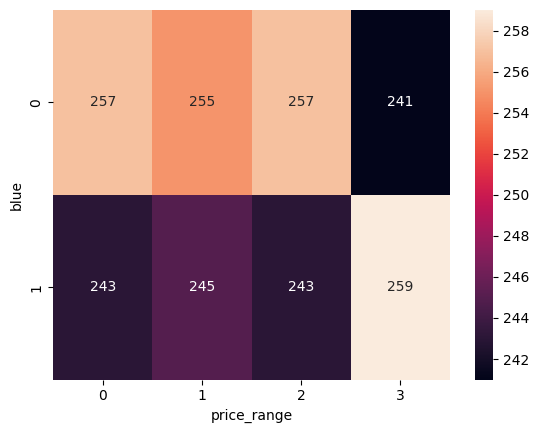

In [17]:
sns.heatmap(train[['blue', 'price_range']].value_counts().unstack(),annot=True, fmt='d')

**clock_speed** : Must be the processor clockspeed

In [18]:
train['clock_speed']

0       2.2
1       0.5
2       0.5
3       2.5
4       1.2
       ... 
1995    0.5
1996    2.6
1997    0.9
1998    0.9
1999    2.0
Name: clock_speed, Length: 2000, dtype: float64

<Axes: xlabel='clock_speed', ylabel='Count'>

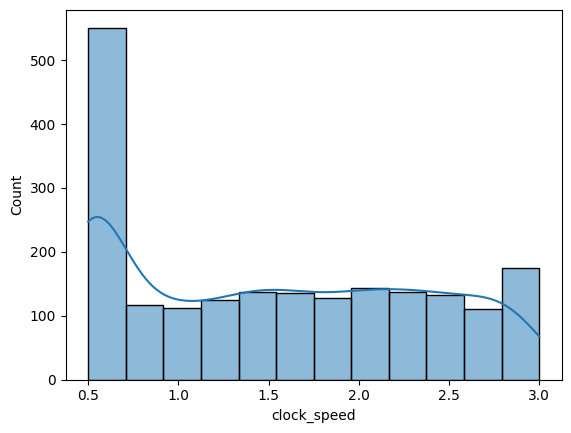

In [19]:
sns.histplot(x='clock_speed',data=train, kde=True)

<Axes: xlabel='clock_speed', ylabel='Density'>

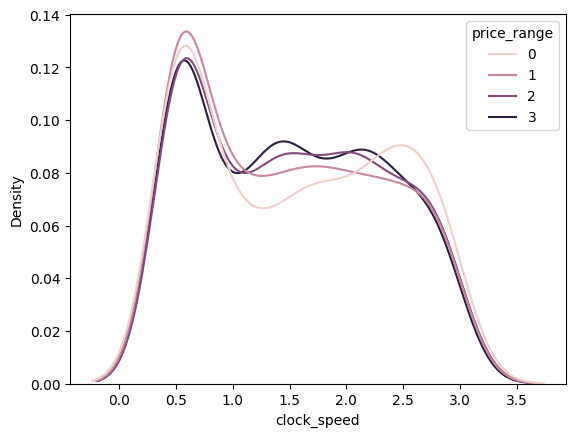

In [20]:
sns.kdeplot(x='clock_speed',hue='price_range',data=train)

*Not able to see any change in price range wrt to clock_speed. So clock speed has no influence on price_range*

<Axes: >

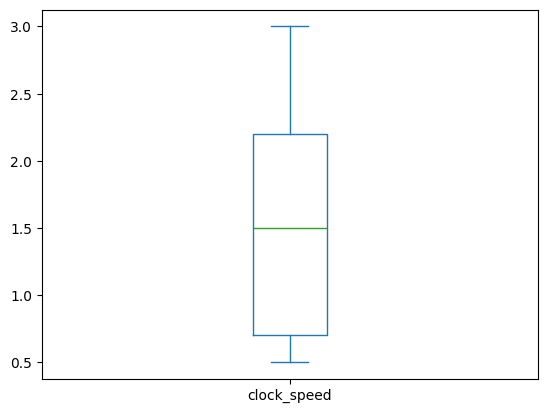

In [21]:
train['clock_speed'].plot(kind='box')

<Axes: xlabel='price_range', ylabel='clock_speed'>

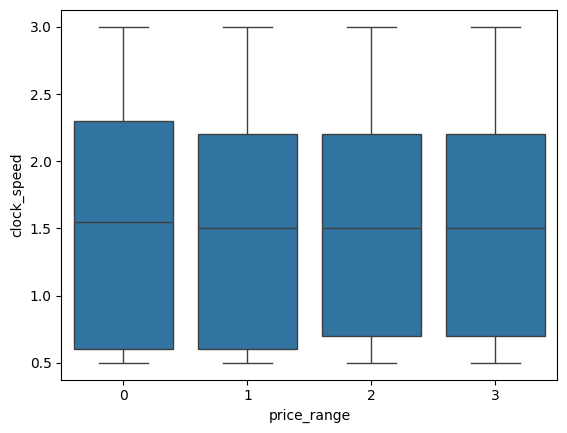

In [22]:
sns.boxplot(x='price_range',y='clock_speed',data=train)

no outliers present

**dual_sim**: comes with dual sim or not

In [23]:
train['dual_sim'].value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

**fc**: Front Camera mega pixels

In [24]:
train['fc'].value_counts()

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

**four_g**: Has 4G or not

In [25]:
train['four_g']

0       0
1       1
2       1
3       0
4       1
       ..
1995    1
1996    0
1997    1
1998    1
1999    1
Name: four_g, Length: 2000, dtype: int64

In [26]:
train['four_g'].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

**int_memory**: Internal Memory in Gigabytes

In [27]:
train['int_memory'].value_counts()

int_memory
27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: count, Length: 63, dtype: int64

In [28]:
train.shape

(2000, 21)

In [29]:
63/2000*100

3.15

<Axes: xlabel='int_memory', ylabel='Count'>

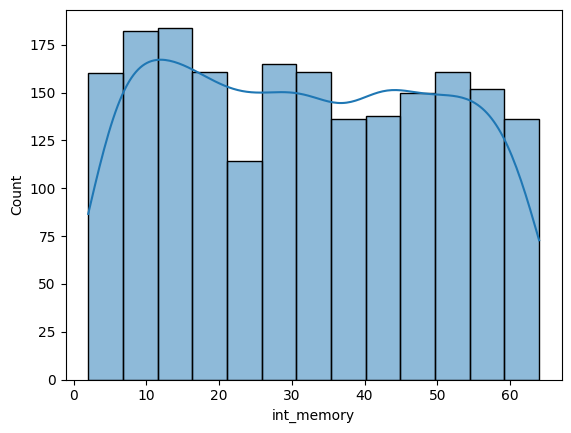

In [30]:
sns.histplot(data=train,x='int_memory',kde=True)

**m_dep**: Mobile Depth in cm

In [31]:
train['m_dep'].value_counts()

m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: count, dtype: int64

<Axes: xlabel='m_dep', ylabel='Count'>

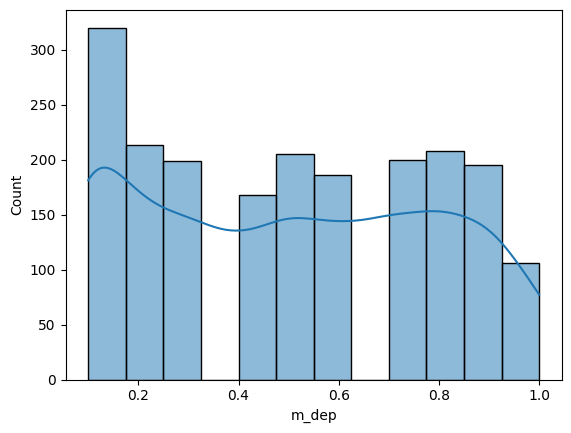

In [32]:
sns.histplot(data = train,x= 'm_dep',kde=True)

**mobile_wt**: Weight of mobile phone

In [33]:
train['mobile_wt'].value_counts()

mobile_wt
182    28
185    27
101    27
199    26
146    26
       ..
137    10
96      9
140     9
120     9
149     9
Name: count, Length: 121, dtype: int64

In [34]:
121/2000*100

6.05

**n_cores**: no of cores in processor

In [35]:
train['n_cores'].value_counts()

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64

**pc**: Primary Camera mega pixels

In [36]:
train['pc'].value_counts()

pc
10    122
7     119
9     112
20    110
14    104
1     104
0     101
17     99
2      99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: count, dtype: int64

In [37]:
for i in ['px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']:
    print(f"{i}: {train[i].nunique()}")

px_height: 1137
px_width: 1109
ram: 1562
sc_h: 15
sc_w: 19
talk_time: 19
three_g: 2
touch_screen: 2
wifi: 2
price_range: 4


**px_height**: Pixel Resolution Height

<Axes: xlabel='px_height', ylabel='Count'>

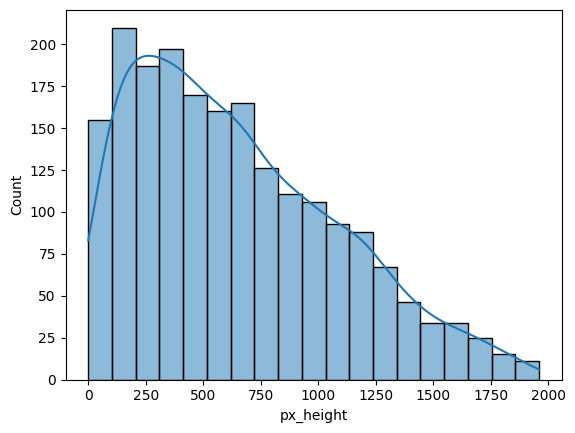

In [38]:
sns.histplot(   data=train,x='px_height',kde=True)

*distribution loks right skewed. so most of the phones have pixel heights between 0 and 750*

<Axes: xlabel='px_height', ylabel='Density'>

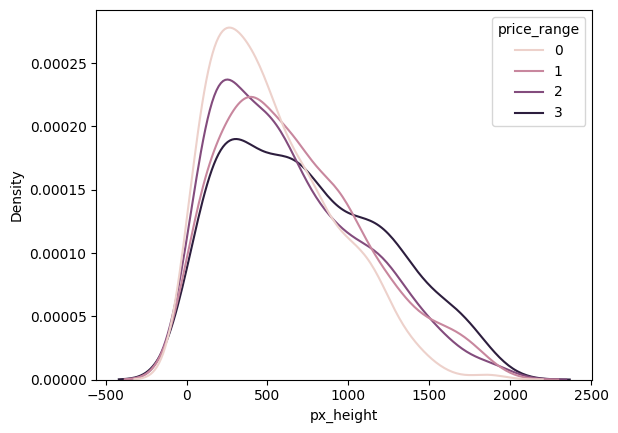

In [39]:
sns.kdeplot(data=train,x='px_height',hue='price_range')

<Axes: ylabel='px_height'>

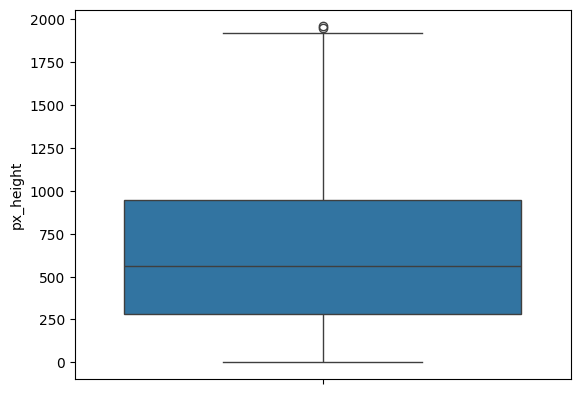

In [40]:
sns.boxplot(y='px_height',data=train)

<Axes: ylabel='px_height'>

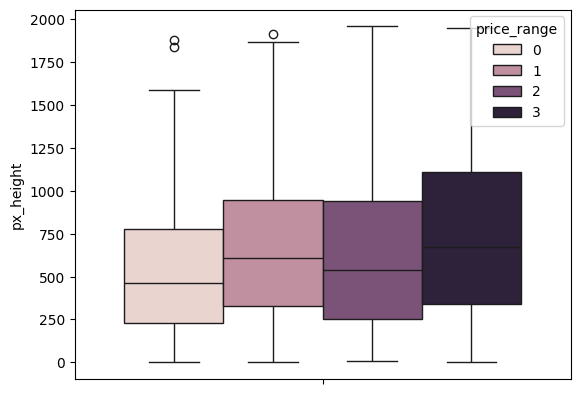

In [41]:
sns.boxplot(y='px_height',data=train,hue='price_range')

can see some outliers. checking who are they

In [42]:
train['px_height']

0         20
1        905
2       1263
3       1216
4       1208
        ... 
1995    1222
1996     915
1997     868
1998     336
1999     483
Name: px_height, Length: 2000, dtype: int64

**px_width**: Pixel Resolution Width

<Axes: xlabel='px_width', ylabel='Count'>

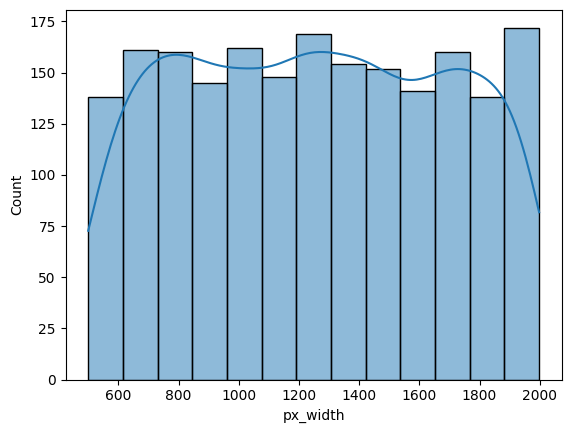

In [43]:
sns.histplot(data=train,x='px_width',kde=True)

<Axes: xlabel='px_width', ylabel='Density'>

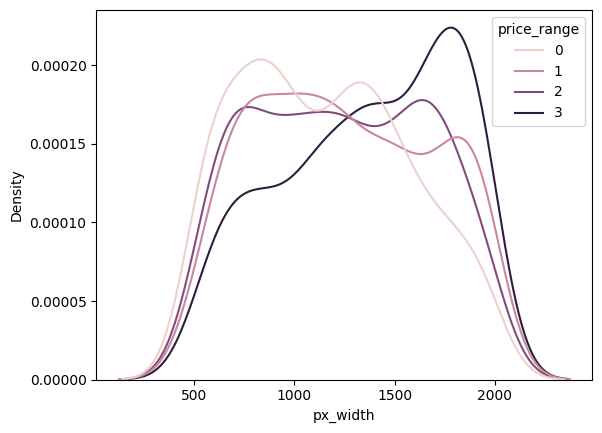

In [44]:
sns.kdeplot(data=train,x='px_width',hue='price_range')

*distribution of pixel height looks right skewed. so most of the phones have pixel heights between 300 and 750. But pixel width is not chaning that much with price except price range 3 where most phones gets better pixel width of 1500 or more*

In [45]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
iiiiiiiiiiii

NameError: name 'iiiiiiiiiiii' is not defined

- how the features are relating to target variables
- understand proper distribution or not
- scatterplot feature vs target
- correlation


- outlier analysis (without reason dont remove)
- handle outliers 


-       ** feature engineering **
- feature transformation
-- total pixrl = height * width
-- screen size ratio = height/width
-- camera gap = pc-fc
-- screen area = screen height * width


- ** feature scaling **
-- standard scaler
-- feature selection (feature correlation)

<Axes: >

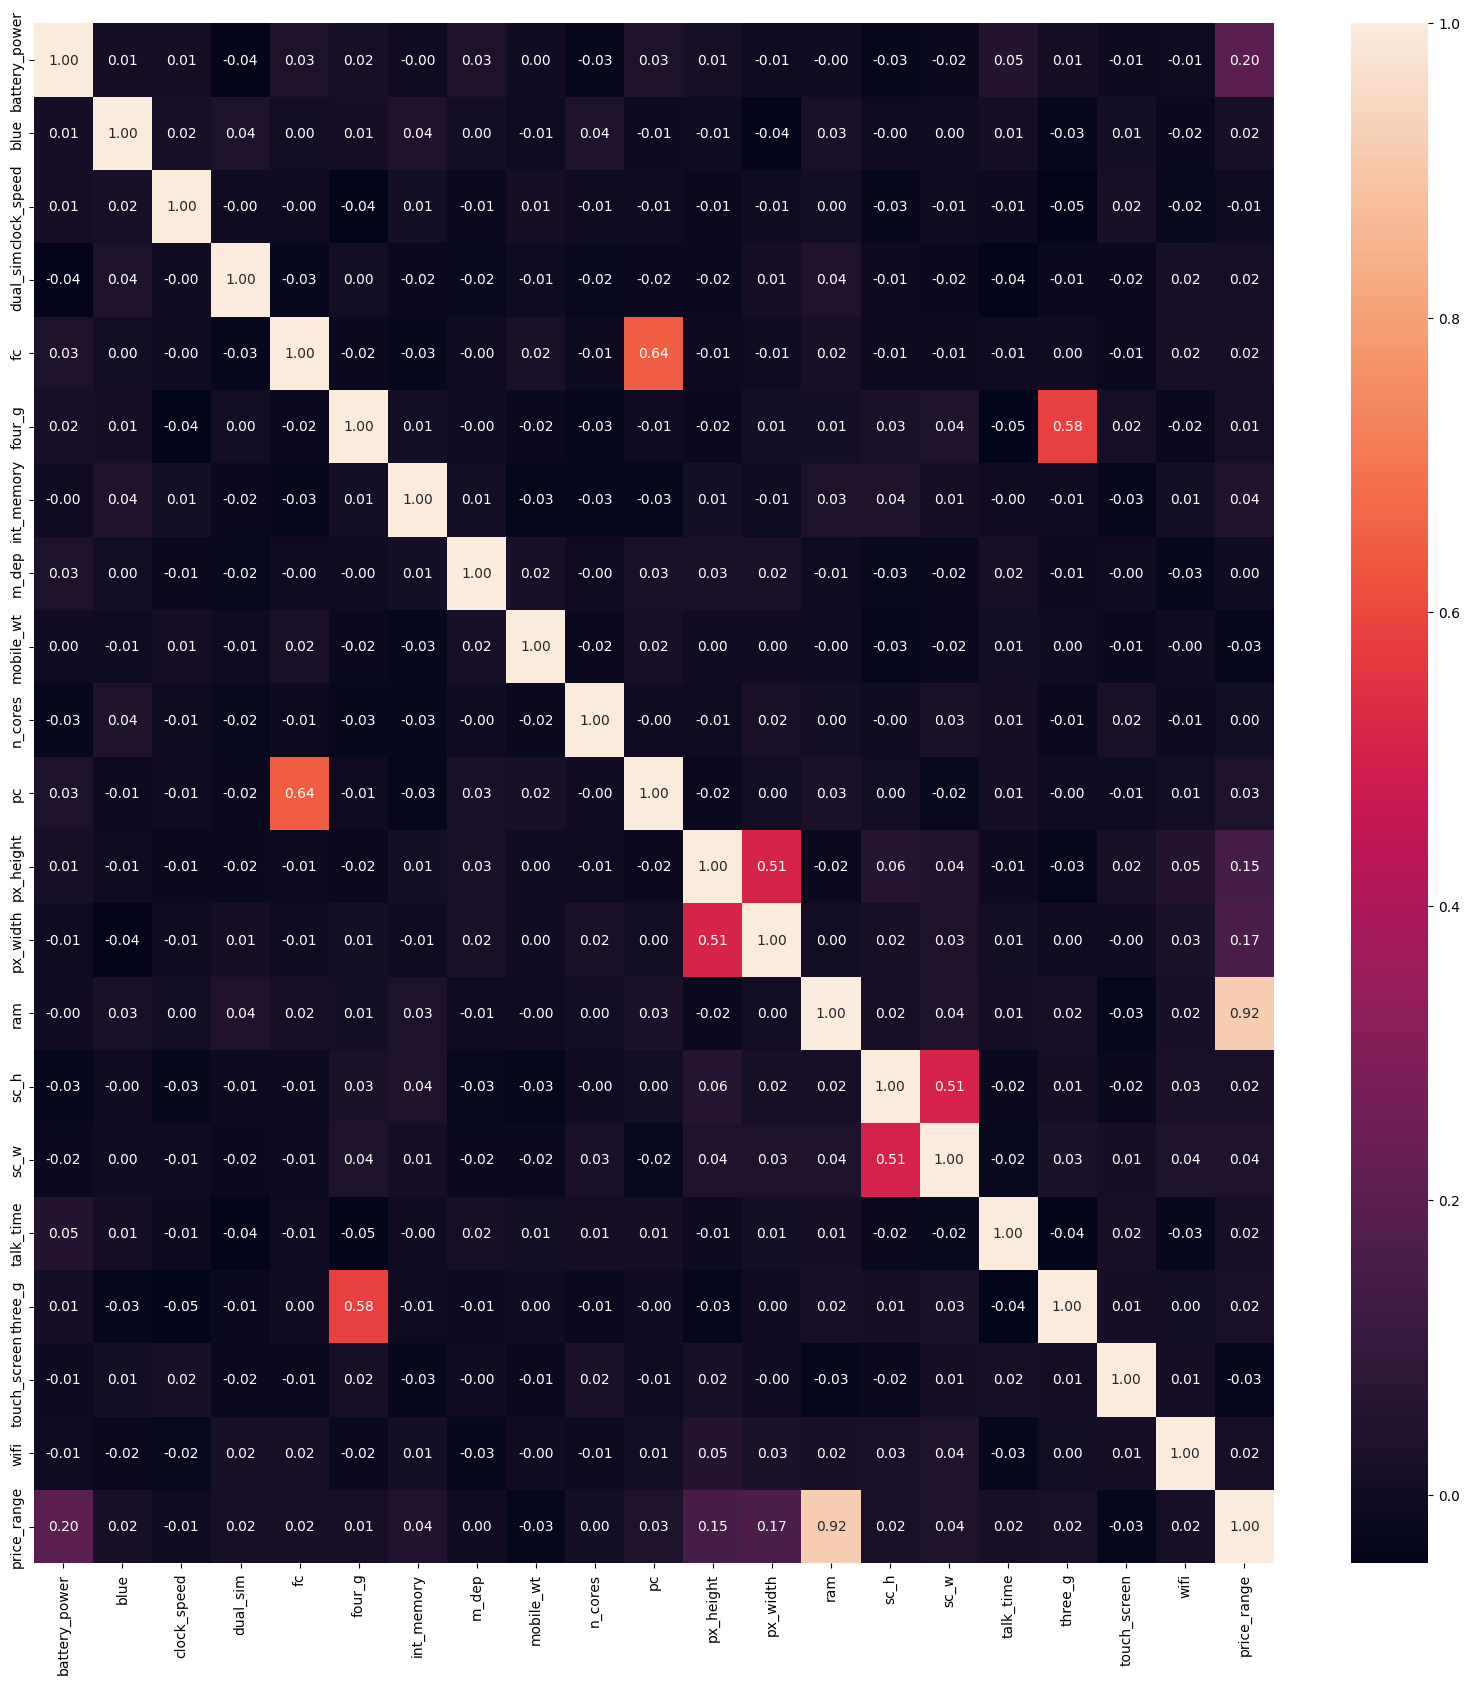

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, fmt='.2f')

informatica, talend, 


adf(azure data factory), adb(azure data bricks), snowflake, 